In [1]:
import pandas as pd
import numpy as np

In [2]:
#Loading the 2 csv files into the dataframes
movies=pd.read_csv("tmdb_5000_movies.csv")
credits=pd.read_csv("tmdb_5000_credits.csv")

In [4]:
#Preserving original copy for future use
k=pd.read_csv("tmdb_5000_movies.csv")

In [5]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
#Merging the two dataframes on the basis of comman column title
movies=movies.merge(credits, on='title')

In [8]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [9]:
#Columns that are important for contributing to tag for content based filtering
#Genres
#Id
#keywords
#title
#overview
#cast
#Crew
# WHAT ATTRIBUTES ARE NOT REQUIRED THAT ARE TO BE REMOVED
# budget
# homepage
# id
# original_language- most movies are in english
# original_title
# popularity
# production_comapny
# production_countries
movies=movies[['movie_id','genres','keywords','title','overview','cast','crew']]

In [10]:
movies.head(1)

,movie_id,genres,keywords,title,overview,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [11]:
#Determining the no of null values
movies.isnull().sum()

movie_id    0
genres      0
keywords    0
title       0
overview    3
cast        0
crew        0
dtype: int64

In [12]:
#Null values in overview have to be removed as there is no possibility to fill it - Important column
movies.dropna(inplace=True)
movies

,movie_id,genres,keywords,title,overview,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,[],[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [13]:
#Determining if there are any duplicate values
movies.duplicated().sum()

0

In [14]:
movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [15]:
#Standardizing the data column - ##Converting the columns that are in the form of a list of dictonaries into a list
import ast
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
       L.append(i['name'])
    return L

In [16]:
movies['genres']=movies['genres'].apply(convert)
movies['keywords']=movies['keywords'].apply(convert)

In [17]:
#For cast
def change3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [18]:
movies['cast']=movies['cast'].apply(change3)

In [19]:
#Crew - Dictionary , where job='Director'

In [20]:
def fetch_dir(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job']=='Director':
            L.append(i['name']) 
            break
    return L

In [21]:
movies['crew']=movies['crew'].apply(fetch_dir)

In [22]:
#Converting overview to list
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [23]:
#Removing spaces between names to avoid it being separate tags
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","")for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","")for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","")for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","")for i in x])

In [24]:
#All standardized and processed columns
movies.head(1)

,movie_id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]


In [25]:
#Concatenating to form single new column tag= overview+genres+keywords+cast+crew
movies['tags']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']

In [26]:
movies.head(1)

,movie_id,genres,keywords,title,overview,cast,crew,tags
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."


In [27]:
#New data frame with tag column
new_df=movies[['movie_id','title','tags']]

In [28]:
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\anu\AppData\Local\Temp\ipykernel_4208\487797088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))


In [29]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [30]:
#Converting to lowercase standardizing
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())

C:\Users\anu\AppData\Local\Temp\ipykernel_4208\3856787367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


In [31]:
new_df.head(1)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."


In [32]:
# NOW WE HAVE TO CONVERT OUR TABLE INTO VECTOR POINTS 

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=7000,stop_words='english')

In [33]:
vectors=cv.fit_transform(new_df['tags']).toarray()

In [34]:
vectors.shape

(4806, 7000)

In [35]:
import nltk

In [36]:
#Making sure there is a single form for all words Eg:talk, talking
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [37]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)
    

In [38]:
new_df['tags']=new_df['tags'].apply(stem)

C:\Users\anu\AppData\Local\Temp\ipykernel_4208\3514595201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


In [39]:
#Distance between movies .based on cosine similarity-angle between them , closer so similarity greater

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
#COMPUTING THE COSINE SIMILARITY
similarity = cosine_similarity(vectors)
similarity

array([[1.        , 0.08134892, 0.05504819, ..., 0.02306328, 0.02469324,
        0.        ],
       [0.08134892, 1.        , 0.05970814, ..., 0.02501564, 0.        ,
        0.        ],
       [0.05504819, 0.05970814, 1.        , ..., 0.02539184, 0.        ,
        0.        ],
       ...,
       [0.02306328, 0.02501564, 0.02539184, ..., 1.        , 0.06834085,
        0.04671418],
       [0.02469324, 0.        , 0.        , ..., 0.06834085, 1.        ,
        0.05001563],
       [0.        , 0.        , 0.        , ..., 0.04671418, 0.05001563,
        1.        ]])

In [41]:
#Movie id - similarity in descending order to pick top 6 similar movies
def recommend(movie):
    movie_index=new_df[new_df['title']==movie].index[0]
    distances =similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key = lambda x: x[1])
    for i in movies_list[1:7]:
        print(new_df.iloc[i[0]].title)

In [42]:
recommend('Gandhi')

Gandhi, My Father
The Wind That Shakes the Barley
A Passage to India
Guiana 1838
Ramanujan
Bloody Sunday


In [43]:
import pickle

In [44]:
#Saves the DataFrame new_df to the file 'movies.pkl' using pickle for future use
pickle.dump(new_df,open('movies.pkl','wb'))

In [45]:
pickle.dump(new_df.to_dict(),open('movie_dict.pkl','wb'))

In [46]:
#Saves the similarity matrix to the file 'similarity.pkl' using pickle for future use.
pickle.dump(similarity,open('similarity.pkl','wb'))

Data Visualization

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

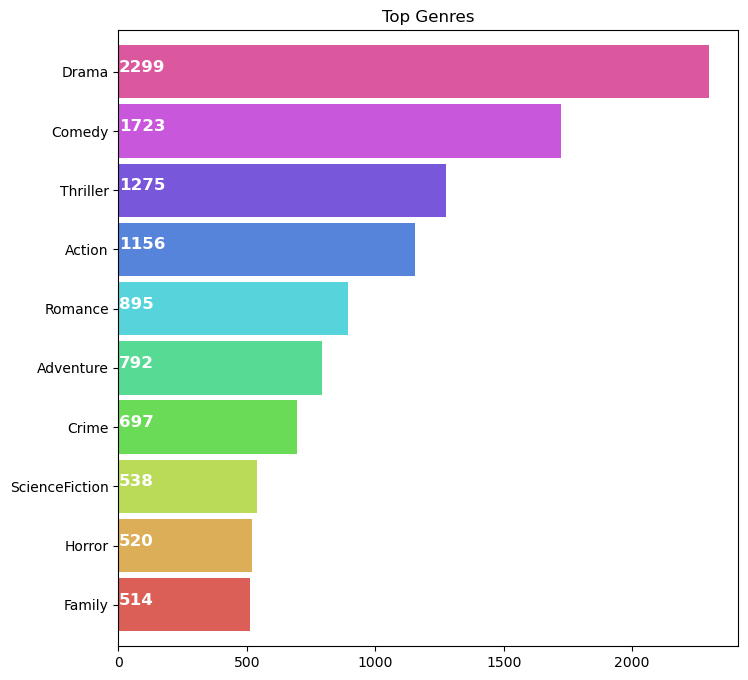

In [48]:
#A subplot to indicate the top genres
plt.subplots(figsize=(8,8))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

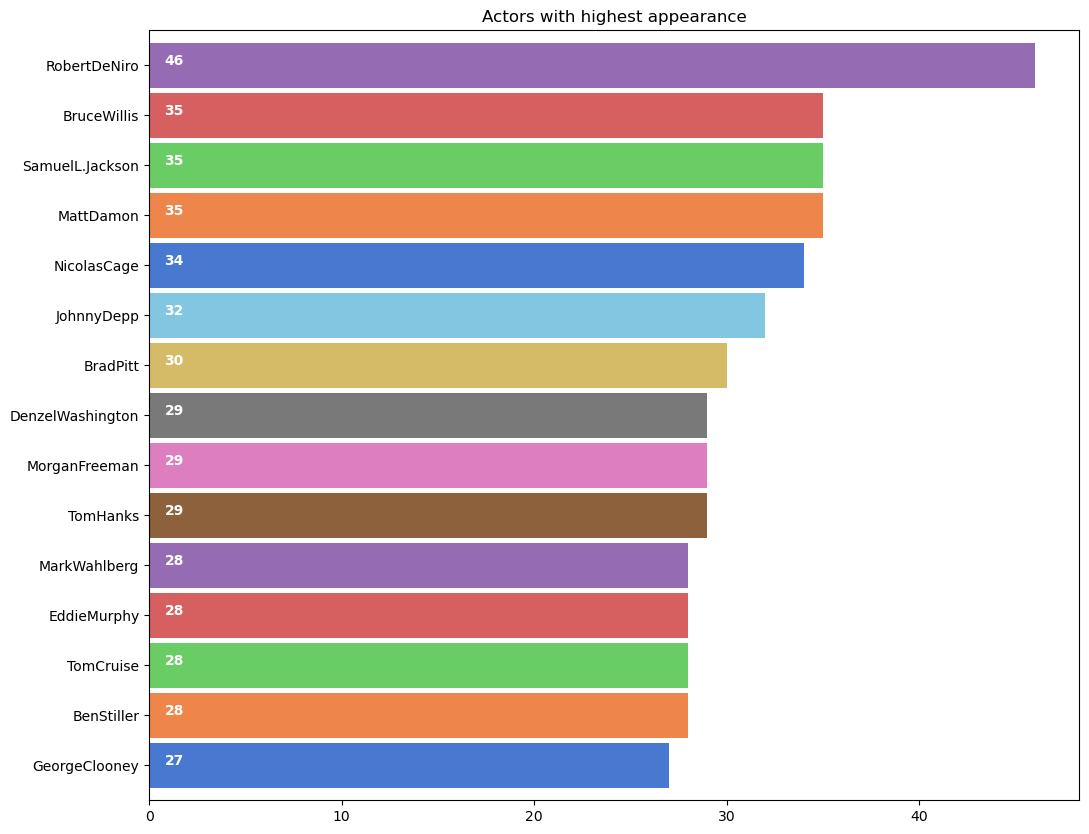

In [51]:
#A subplot to indicate the actors with the highest appearance
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

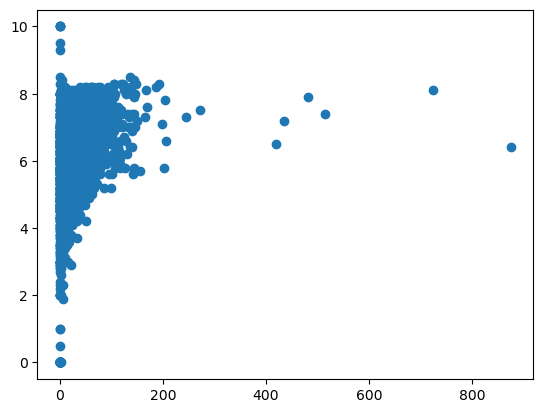

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
#A scatteplot between popularity and vote average
x=k['popularity']
y=k['vote_average']
plt.scatter(x,y);
plt.show()

<Axes: >

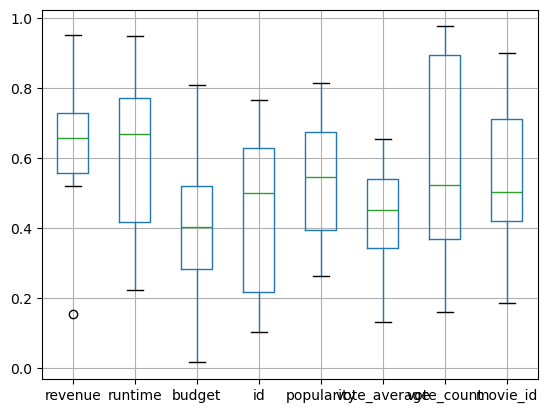

In [54]:
#Boxplot to indicate outliers
df=pd.DataFrame(data=np.random.random(size=(8,8)),columns =['revenue','runtime','budget','id','popularity','vote_average','vote_count','movie_id'])
df.boxplot()

In [55]:
#Computing the pearson correlation coefficient between popularity and vote average
from scipy.stats import pearsonr
list1 = df['popularity']
list2 = df['vote_average']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.285


In [56]:
#Computing the pearson correlation coefficient between popularity and vote count
from scipy.stats import pearsonr
list1 = df['popularity']
list2 = df['vote_count']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.117
